In [288]:
#allow output from every line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [289]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [309]:
nhl_2019 = pd.read_excel("2019 nhl standings.xlsx")
nhl_2019['Season'] = 2019
nhl_2019
nhl_2018 = pd.read_excel("2018 nhl standings.xlsx")
nhl_2018['Season'] = 2018
nhl_2018
nhl_2017 = pd.read_excel("2017 nhl standings.xlsx")
nhl_2017['Season'] = 2017
nhl_2017

### Data came from espn and Naturalstattrick


##

,Team,CF%,GP,W,L,OTL,PTS,ROW,SOW,SOL,...,DIFF,L10,STRK,PG,PPO,PP%,PPGA,PPOA,PK%,Season
0,TB,0.5121,82,62,16,4,128,56,6,1,...,103,2000-07-03,W2,74,262,28.2,40,267,85.0,2019
1,CGY,0.5308,82,50,25,7,107,50,0,4,...,62,2000-06-04,L2,53,275,19.3,50,246,79.7,2019
2,BOS,0.5354,82,49,24,9,107,47,2,3,...,44,2000-06-04,L1,65,251,25.9,49,244,79.9,2019
3,WSH,0.4898,82,48,26,8,104,44,4,1,...,29,2001-06-03,L1,49,236,20.8,55,261,78.9,2019
4,NYI,0.4785,82,48,27,7,103,43,5,5,...,32,2000-06-04,W2,33,227,14.5,44,219,79.9,2019
5,SJS,0.5487,82,46,27,9,101,46,0,3,...,28,2001-03-06,W2,57,241,23.7,45,234,80.8,2019
6,TOR,0.5173,82,46,28,8,100,46,0,2,...,35,2003-03-04,L3,46,211,21.8,41,204,79.9,2019
7,NSH,0.5224,82,47,29,6,100,43,4,2,...,26,2001-07-02,W3,33,255,12.9,45,251,82.1,2019
8,PIT,0.4973,82,44,26,12,100,42,2,3,...,32,2003-05-02,L1,56,228,24.6,45,222,79.7,2019
9,WPG,0.4897,82,47,30,5,99,45,2,1,...,28,2001-04-05,W1,44,247,17.8,44,239,81.6,2019


,Team,CF%,W,L,OTL,PTS,ROW,SOW,SOL,GF,GA,DIFF,PG,PPO,PP%,PPGA,PPOA,PK%,Season
0,NSH,0.5148,53,18,11,117,47,6,7,267,211,56,58,273,21.2,54,299,81.9,2018
1,WPG,0.5150,52,20,10,114,48,4,2,277,218,59,64,274,23.4,50,274,81.8,2018
2,TB,0.5165,54,23,5,113,48,6,2,296,236,60,66,276,23.9,64,268,76.1,2018
3,BOS,0.5372,50,20,12,112,47,3,3,270,214,56,61,259,23.6,40,246,83.7,2018
4,VGK,0.5084,51,24,7,109,47,4,3,272,228,44,53,248,21.4,44,237,81.4,2018
5,WSH,0.4796,49,26,7,105,46,3,1,259,239,20,55,244,22.5,53,269,80.3,2018
6,TOR,0.4982,49,26,7,105,42,7,2,277,232,45,56,225,24.9,43,231,81.4,2018
7,MIN,0.4719,45,26,11,101,42,3,3,253,232,21,49,240,20.4,51,272,81.3,2018
8,ANA,0.4857,44,25,13,101,40,4,7,235,216,19,38,214,17.8,46,274,83.2,2018
9,SJS,0.5090,45,27,10,100,45,2,2,272,250,22,53,256,20.7,34,224,84.8,2018


,Team,CF%,W,L,OTL,PTS,ROW,SOW,SOL,HOME,...,DIFF,L10,STRK,PG,PPO,PP%,PPGA,PPOA,PK%,Season
0,WSH,0.5181,55,19,8,118,53,2,5,32-7-2,...,81,2000-08-02 00:00:00,L1,57,247,23.1,44,272,83.8,2017
1,PIT,0.5014,50,21,11,111,46,4,5,31-6-4,...,48,2002-04-04 00:00:00,L2,60,260,23.1,52,257,79.8,2017
2,CHI,0.5041,50,23,9,109,46,4,1,26-10-5,...,31,2004-03-03 00:00:00,L4,42,233,18.0,47,211,77.7,2017
3,CBJ,0.5029,50,24,8,108,48,2,2,28-12-1,...,54,2002-03-05 00:00:00,W1,42,211,19.9,39,223,82.5,2017
4,MIN,0.4934,49,25,8,106,46,3,2,27-12-2,...,58,2002-05-03 00:00:00,W4,47,224,21.0,37,217,82.9,2017
5,ANA,0.4967,46,23,13,105,43,3,3,29-8-4,...,23,8-0-2,W4,47,251,18.7,43,281,84.7,2017
6,MTL,0.5254,47,26,9,103,44,3,2,24-12-5,...,26,2001-06-03 00:00:00,W1,56,245,22.9,43,223,80.7,2017
7,EDM,0.4999,47,26,9,103,43,4,5,25-12-4,...,35,2000-08-02 00:00:00,W3,45,229,19.7,47,249,81.1,2017
8,NYR,0.4795,48,28,6,102,45,3,4,21-16-4,...,36,2003-03-04 00:00:00,W1,47,232,20.3,45,223,79.8,2017
9,STL,0.5018,46,29,7,99,44,2,2,24-12-5,...,17,2002-07-01 00:00:00,W3,50,235,21.3,40,263,84.8,2017


In [291]:
nhl1 = pd.concat([nhl_2019,nhl_2018,nhl_2017])
nhl = nhl1.set_index(['Team','Season'])

nhl

,,CF%,GP,W,L,OTL,PTS,ROW,SOW,SOL,HOME,...,GA,DIFF,L10,STRK,PG,PPO,PP%,PPGA,PPOA,PK%
Team,Season,,,,,,,,,,,,,,,,,,,,,
TB,2019,0.5121,82.0,62,16,4,128,56,6,1,32-7-2,...,222,103,2000-07-03 00:00:00,W2,74,262,28.2,40,267,85.0
CGY,2019,0.5308,82.0,50,25,7,107,50,0,4,26-10-5,...,227,62,2000-06-04 00:00:00,L2,53,275,19.3,50,246,79.7
BOS,2019,0.5354,82.0,49,24,9,107,47,2,3,29-9-3,...,215,44,2000-06-04 00:00:00,L1,65,251,25.9,49,244,79.9
WSH,2019,0.4898,82.0,48,26,8,104,44,4,1,24-11-6,...,249,29,2001-06-03 00:00:00,L1,49,236,20.8,55,261,78.9
NYI,2019,0.4785,82.0,48,27,7,103,43,5,5,24-13-4,...,196,32,2000-06-04 00:00:00,W2,33,227,14.5,44,219,79.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BUF,2017,0.4723,NaN,33,37,12,78,31,2,6,20-15-6,...,237,-36,2000-04-06 00:00:00,L2,57,233,24.5,53,237,77.6
NJD,2017,0.4780,NaN,28,40,14,70,25,3,3,16-17-8,...,244,-61,2002-01-07 00:00:00,L3,38,235,16.2,59,260,77.3
ARI,2017,0.4504,NaN,30,42,10,70,24,6,2,18-18-5,...,260,-63,2001-04-05 00:00:00,L1,44,251,17.5,53,260,79.6


In [292]:
nhl1 = pd.concat([nhl_2019,nhl_2018,nhl_2017])
nhl2 = nhl1[{'Team':nhl1['Team'],'Season':nhl1['Season'],'PTS':nhl1['PTS'],'CF%':nhl1['CF%'],'ROW':nhl1['ROW'],
             'PG':nhl1['PG'],'GF':nhl1['GF'],'GA':nhl1['GA'],'DIFF':nhl1['DIFF'],'PP%':nhl1['PP%'],'PK%':nhl1['PK%']}].reset_index(drop=True)
nhl2['EV'] = nhl2['GF']-nhl2['PG']
nhl2 = nhl2.rename(columns={'CF%':'CF_PCT','PK%': 'PK_PCT','PP%':'PP_PCT'})
nhl2

/var/folders/gx/s8kyc2ps4l96zgqfzf_53rl40000gn/T/ipykernel_41344/2975553310.py:2: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  nhl2 = nhl1[{'Team':nhl1['Team'],'Season':nhl1['Season'],'PTS':nhl1['PTS'],'CF%':nhl1['CF%'],'ROW':nhl1['ROW'],


,Team,Season,PTS,CF_PCT,ROW,PG,GF,GA,DIFF,PP_PCT,PK_PCT,EV
0,TB,2019,128,0.5121,56,74,325,222,103,28.2,85.0,251
1,CGY,2019,107,0.5308,50,53,289,227,62,19.3,79.7,236
2,BOS,2019,107,0.5354,47,65,259,215,44,25.9,79.9,194
3,WSH,2019,104,0.4898,44,49,278,249,29,20.8,78.9,229
4,NYI,2019,103,0.4785,43,33,228,196,32,14.5,79.9,195
...,...,...,...,...,...,...,...,...,...,...,...,...
87,BUF,2017,78,0.4723,31,57,201,237,-36,24.5,77.6,144
88,NJD,2017,70,0.4780,25,38,183,244,-61,16.2,77.3,145
89,ARI,2017,70,0.4504,24,44,197,260,-63,17.5,79.6,153
90,VAN,2017,69,0.4792,26,32,182,243,-61,14.1,76.7,150


In [293]:
nhl3 = nhl2.groupby(['Team','Season']).mean()
nhl3['CF_PCT'] = nhl3['CF_PCT']*100
nhl3

PTS  CF_PCT   ROW    PG     GF     GA  DIFF  PP_PCT  PK_PCT  \
Team Season                                                                  
ANA  2017    105.0   49.67  43.0  47.0  223.0  200.0  23.0    18.7    84.7   
     2018    101.0   48.57  40.0  38.0  235.0  216.0  19.0    17.8    83.2   
     2019     80.0   47.60  32.0  36.0  199.0  251.0 -52.0    17.0    79.7   
ARI  2017     70.0   45.04  24.0  44.0  197.0  260.0 -63.0    17.5    79.6   
     2018     70.0   48.10  27.0  41.0  208.0  256.0 -48.0    16.9    79.6   
...            ...     ...   ...   ...    ...    ...   ...     ...     ...   
WPG  2018    114.0   51.50  48.0  64.0  277.0  218.0  59.0    23.4    81.8   
     2019     99.0   48.97  45.0  44.0  272.0  244.0  28.0    17.8    81.6   
WSH  2017    118.0   51.81  53.0  57.0  263.0  182.0  81.0    23.1    83.8   
     2018    105.0   47.96  46.0  55.0  259.0  239.0  20.0    22.5    80.3   
     2019    104.0   48.98  44.0  49.0  278.0  249.0  29.0    20.8    78.9   

                EV  
Team Season         
ANA  2017    176.0  
     2018    197.0  
     2019    163.0  
ARI  2017    153.0  
     2018    167.0  
...            ...  
WPG  2018    213.0  
     2019    228.0  
WSH  2017    206.0  
     2018    204.0  
     2019    229.0  

[92 rows x 10 columns]

             PTS    CF_PCT       ROW        PG        GF        GA      DIFF  \
PTS     1.000000  0.463843  0.957889  0.458009  0.753474 -0.725594  0.977238   
CF_PCT  0.463843  1.000000  0.500071  0.199356  0.306393 -0.452840  0.496810   
ROW     0.957889  0.500071  1.000000  0.418946  0.754803 -0.698883  0.961323   
PG      0.458009  0.199356  0.418946  1.000000  0.578883 -0.096751  0.460483   
GF      0.753474  0.306393  0.754803  0.578883  1.000000 -0.145568  0.781879   
GA     -0.725594 -0.452840 -0.698883 -0.096751 -0.145568  1.000000 -0.730607   
DIFF    0.977238  0.496810  0.961323  0.460483  0.781879 -0.730607  1.000000   
PP_PCT  0.465742  0.149015  0.443414  0.931763  0.590794 -0.101153  0.471477   
PK_PCT  0.439125  0.244910  0.441954  0.130568  0.155153 -0.571958  0.467494   
EV      0.702271  0.280257  0.719672  0.276819  0.943792 -0.132325  0.734742   

          PP_PCT    PK_PCT        EV  
PTS     0.465742  0.439125  0.702271  
CF_PCT  0.149015  0.244910  0.280257  
RO

<AxesSubplot:>

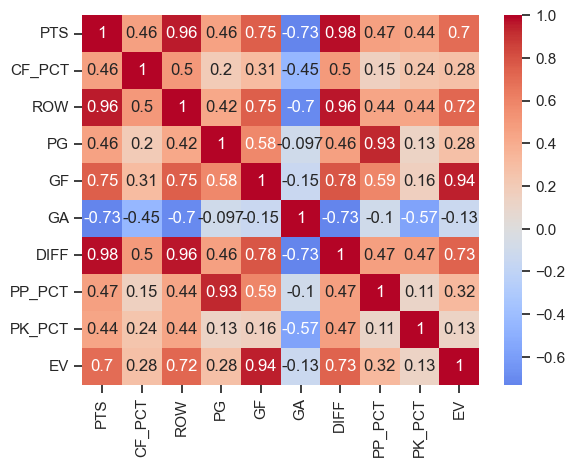

In [294]:
corr_matrix = nhl3.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True)
plt.savefig('nhl3_heatmap.jpg', format='jpg')
plt.show()

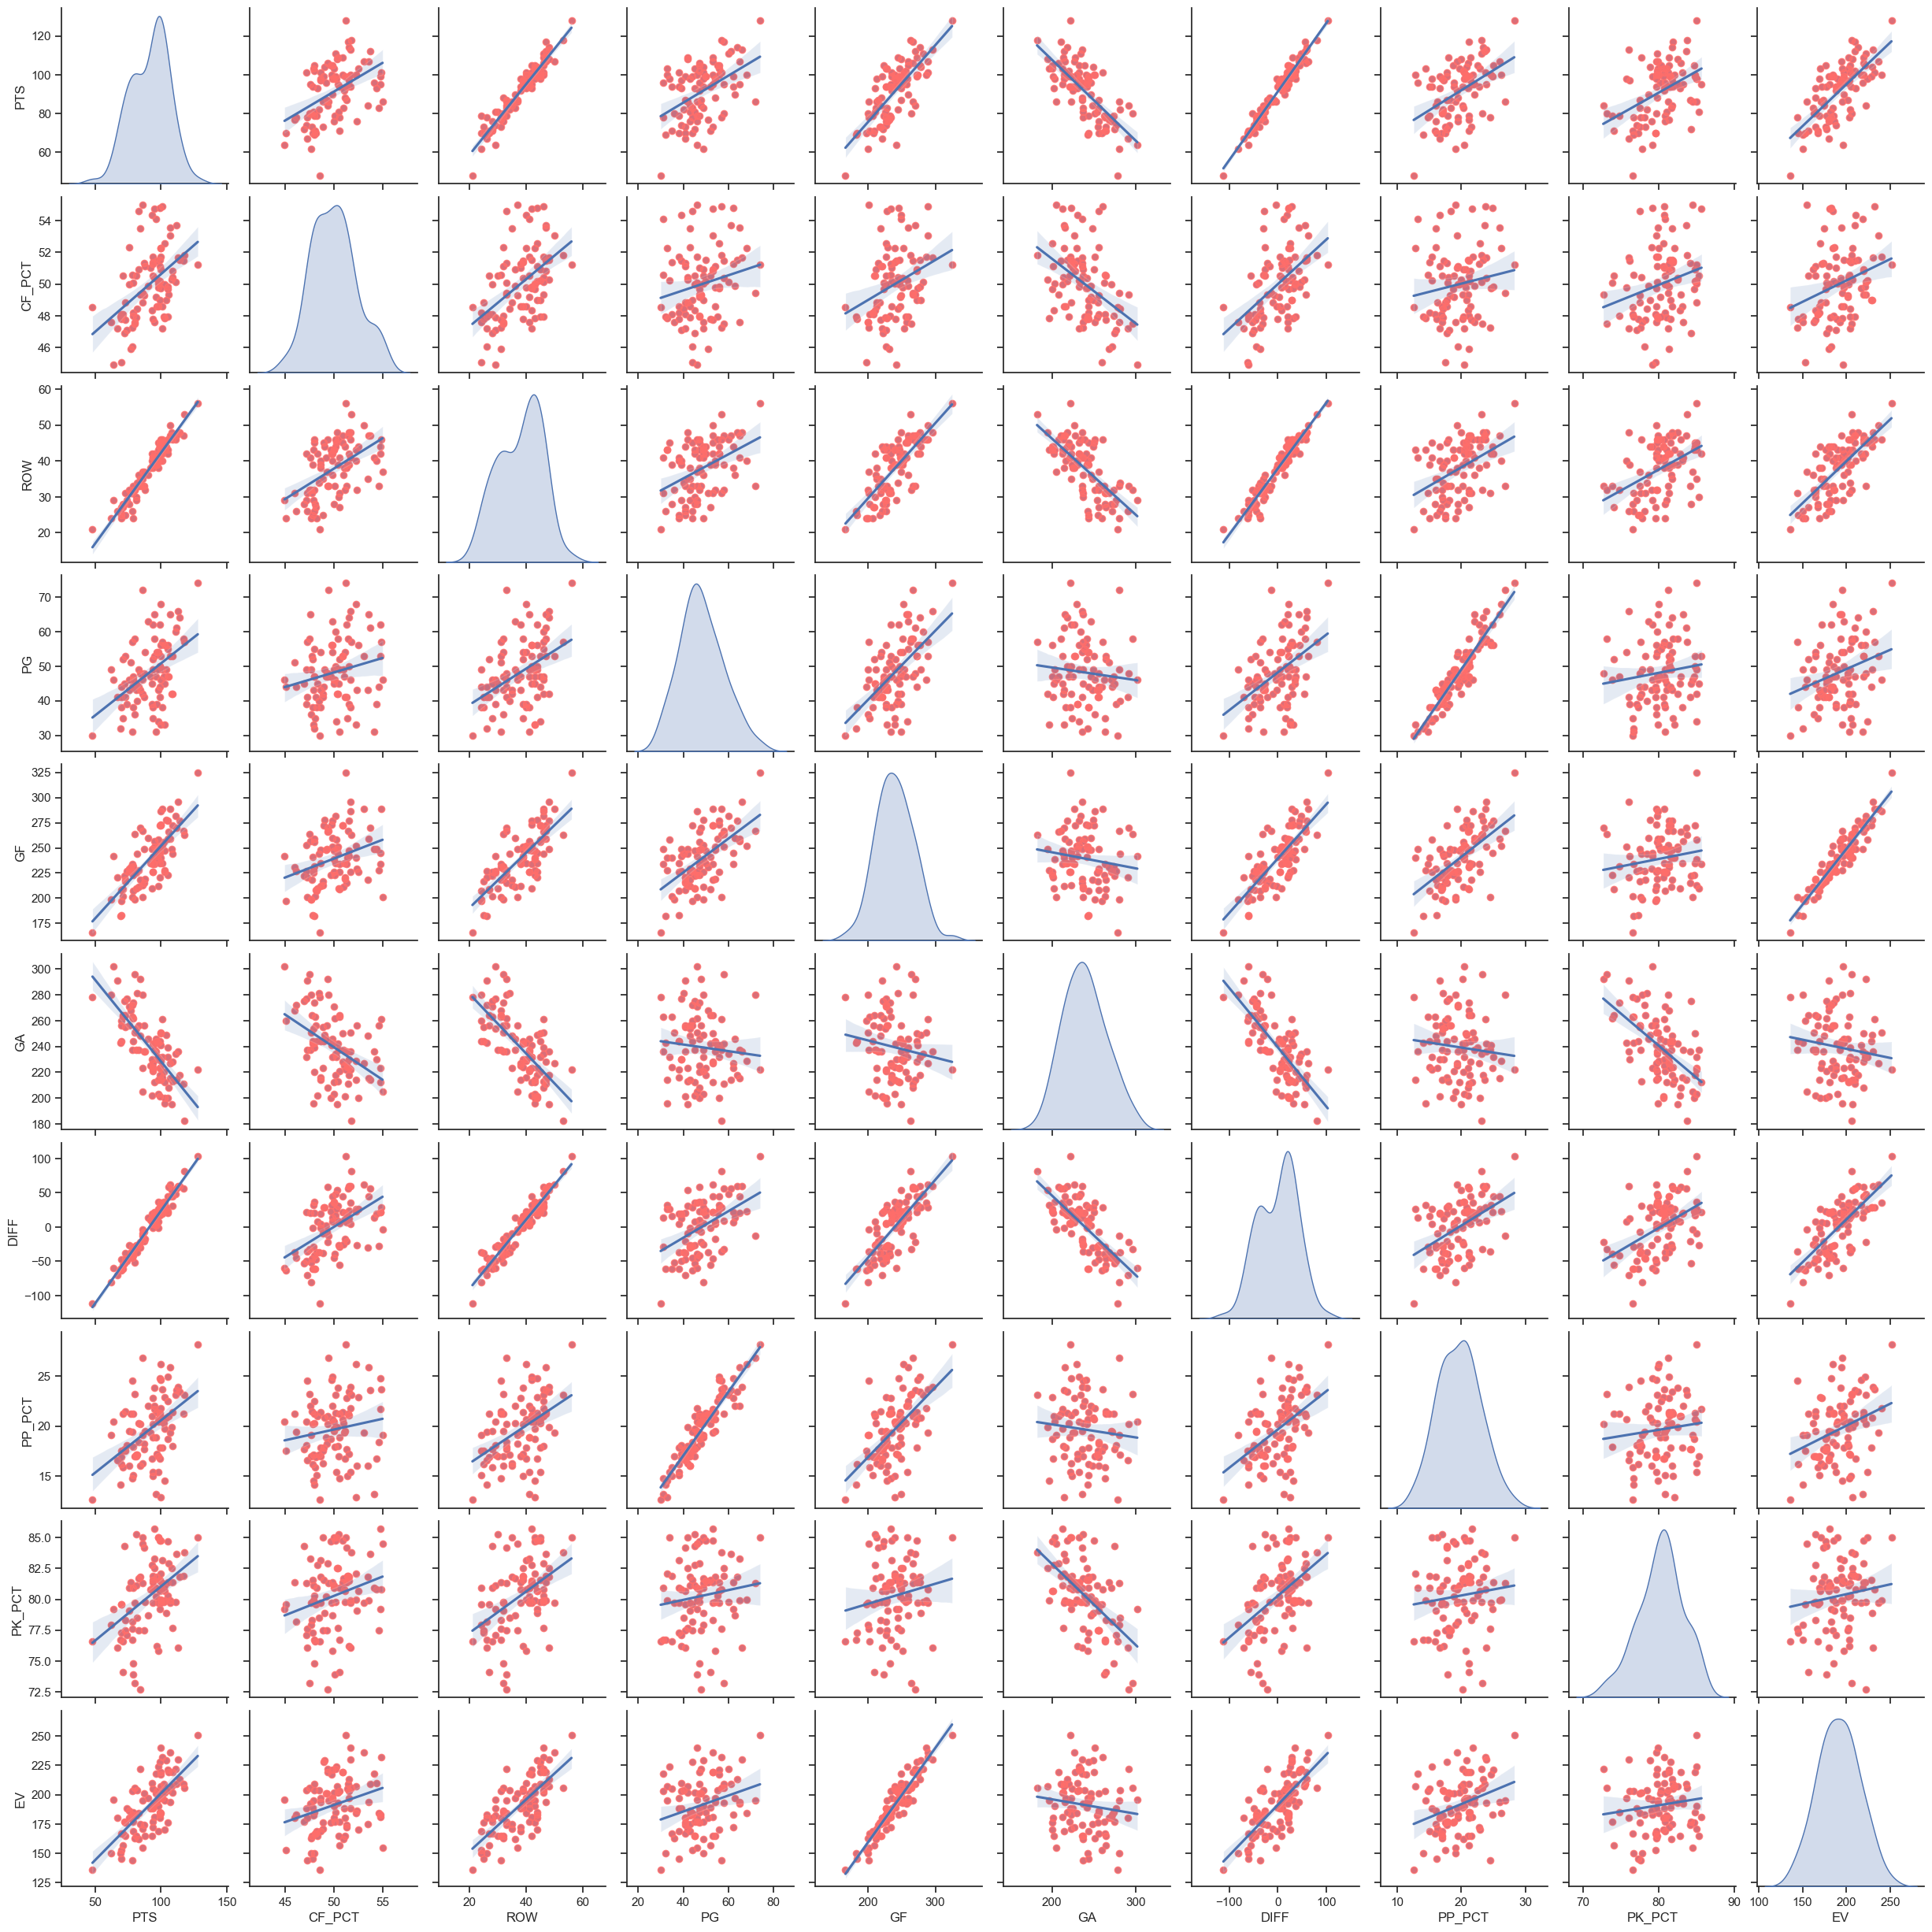

In [295]:
plot = sns.pairplot(nhl3,diag_kind="kde")
plot.map_offdiag(sns.regplot,scatter_kws={"color":"#FF6D6A"})
plt.savefig('DiagCor.jpg', format='jpg')


Text(0.5, 1.0, 'Residuals vs. Predicted Values')

Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

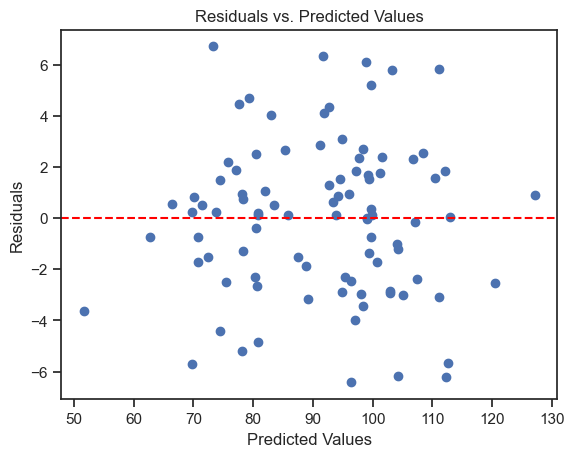

In [296]:
X = nhl2[['GA','GF','CF_PCT','PP_PCT','PK_PCT']]
y = nhl2['PTS']

model = sm.OLS(y, sm.add_constant(X)).fit()

residuals = model.resid
predicted = model.predict(sm.add_constant(X))

plt.scatter(predicted, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.savefig('resid.jpg', format='jpg')

plt.show()

In [297]:
model = ols('PTS ~ CF_PCT+GA+GF+PP_PCT+PK_PCT', data=nhl2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table 
#GF = ~0.0000
#GA = ~0.0000
#both have pvalues below .05, 

,sum_sq,df,F,PR(>F)
CF_PCT,15.711372,1.0,1.624256,2.059324e-01
GA,4845.873101,1.0,500.970638,1.258683e-37
GF,5115.741378,1.0,528.869859,1.702559e-38
PP_PCT,3.070525,1.0,0.317434,5.746202e-01
PK_PCT,17.668523,1.0,1.826587,1.800755e-01
Residual,831.875273,86.0,NaN,NaN


In [298]:
X = nhl2[['GF','GA','CF_PCT','PP_PCT','PK_PCT']]
y = nhl2['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("R-squared:", lr_model.score(X_test, y_test))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))

print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)


LinearRegression()

R-squared: 0.9579886622649345
Mean squared error: 9.05960565925295
Mean absolute error: 2.465133111834468
Coefficients: [ 3.50789744e-01 -3.87055842e-01 -1.12853541e+01 -5.66074067e-03
 -2.54552613e-01]
Intercept: 126.34146728064411


<AxesSubplot:xlabel='GF', ylabel='PTS'>

<AxesSubplot:xlabel='GA', ylabel='PTS'>

<AxesSubplot:xlabel='CF_PCT', ylabel='PTS'>

<AxesSubplot:xlabel='EV', ylabel='PTS'>

Text(0.5, 1.0, 'PTS vs. Goals For Scatterplot')

Text(0, 0.5, 'PTS')

Text(0.5, 0, 'GF')

Text(0.5, 1.0, 'PTS vs. Goals Against Scatterplot')

Text(0, 0.5, 'PTS')

Text(0.5, 0, 'GA')

Text(0.5, 1.0, 'PTS vs. Corsi For% Scatterplot')

Text(0, 0.5, 'PTS')

Text(0.5, 0, 'CF%')

Text(0.5, 1.0, 'PTS vs. Even Strength Goals Scatterplot')

Text(0, 0.5, 'PTS')

Text(0.5, 0, 'EV')

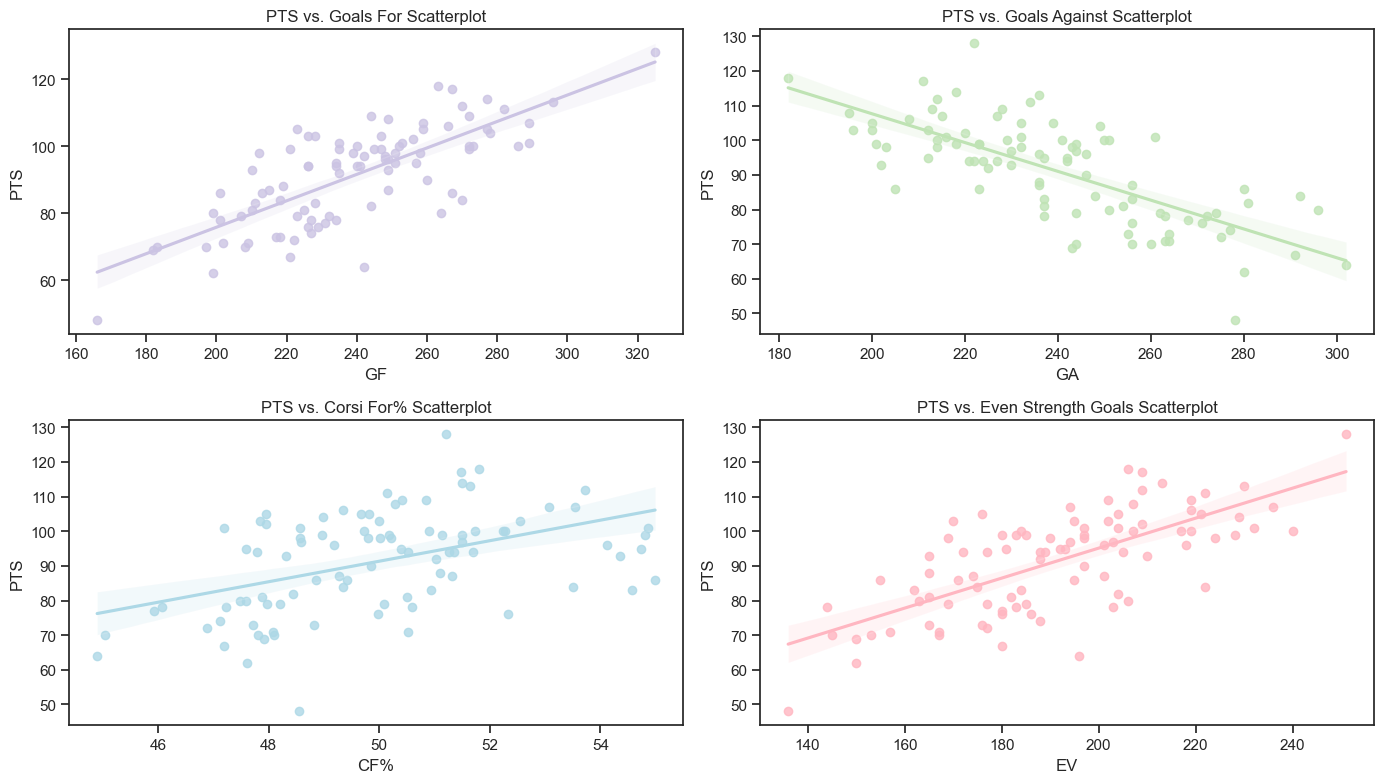

In [310]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.regplot(x="GF",y="PTS",data=nhl3,color = '#CBC3E3',ax=ax1)
sns.regplot(x="GA",y="PTS",data=nhl3,color = '#bfe3b4',ax=ax2)
sns.regplot(x="CF_PCT",y="PTS",data=nhl3,color = '#ADD8E6',ax=ax3)
sns.regplot(x="EV",y="PTS",data=nhl3,color = '#FFB6C1',ax=ax4)


ax1.set_title("PTS vs. Goals For Scatterplot")
ax1.set_ylabel("PTS")
ax1.set_xlabel("GF")

ax2.set_title("PTS vs. Goals Against Scatterplot")
ax2.set_ylabel("PTS")
ax2.set_xlabel("GA")

ax3.set_title("PTS vs. Corsi For% Scatterplot")
ax3.set_ylabel("PTS")
ax3.set_xlabel("CF%")

ax4.set_title("PTS vs. Even Strength Goals Scatterplot")
ax4.set_ylabel("PTS")
ax4.set_xlabel("EV")
fig.savefig("Plot1.jpg")
fig.tight_layout() 

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Team and Season')

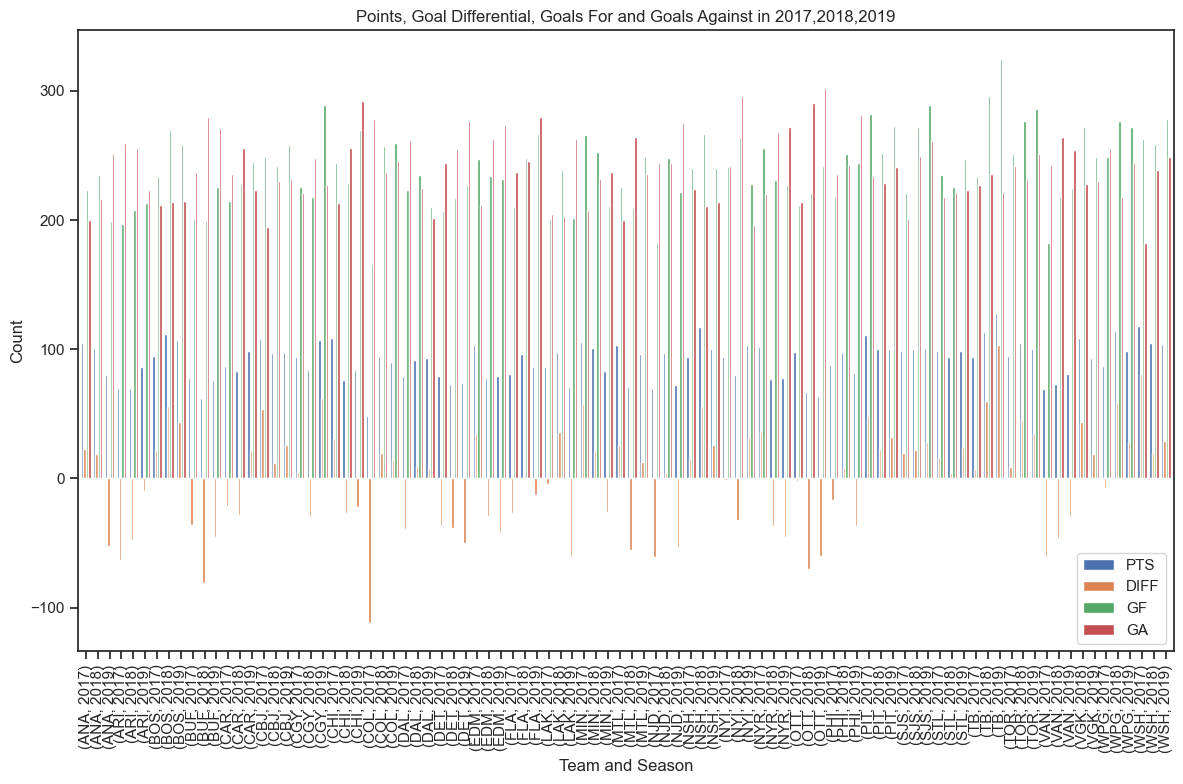

In [300]:
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(1,1,1)
p1 = nhl3[['PTS','DIFF','GF','GA']].plot.bar(title="Points, Goal Differential, Goals For and Goals Against in 2017,2018,2019",ax = ax1,width=.8).legend(loc="lower right")
ax1.set_ylabel("Count")
ax1.set_xlabel("Team and Season")
fig1.savefig("Plot2.jpg")

fig1.tight_layout()

In [301]:
season_2019 = nhl2[nhl2['Season'] == 2019]
season_2019=season_2019.set_index('Team')

season_2018 = nhl2[nhl2['Season'] == 2018]
season_2018=season_2018.set_index('Team')

season_2017 = nhl2[nhl2['Season'] == 2017]
season_2017=season_2017.set_index('Team')


Text(0, 0.5, 'Count')

Text(0.5, 0, 'Team')

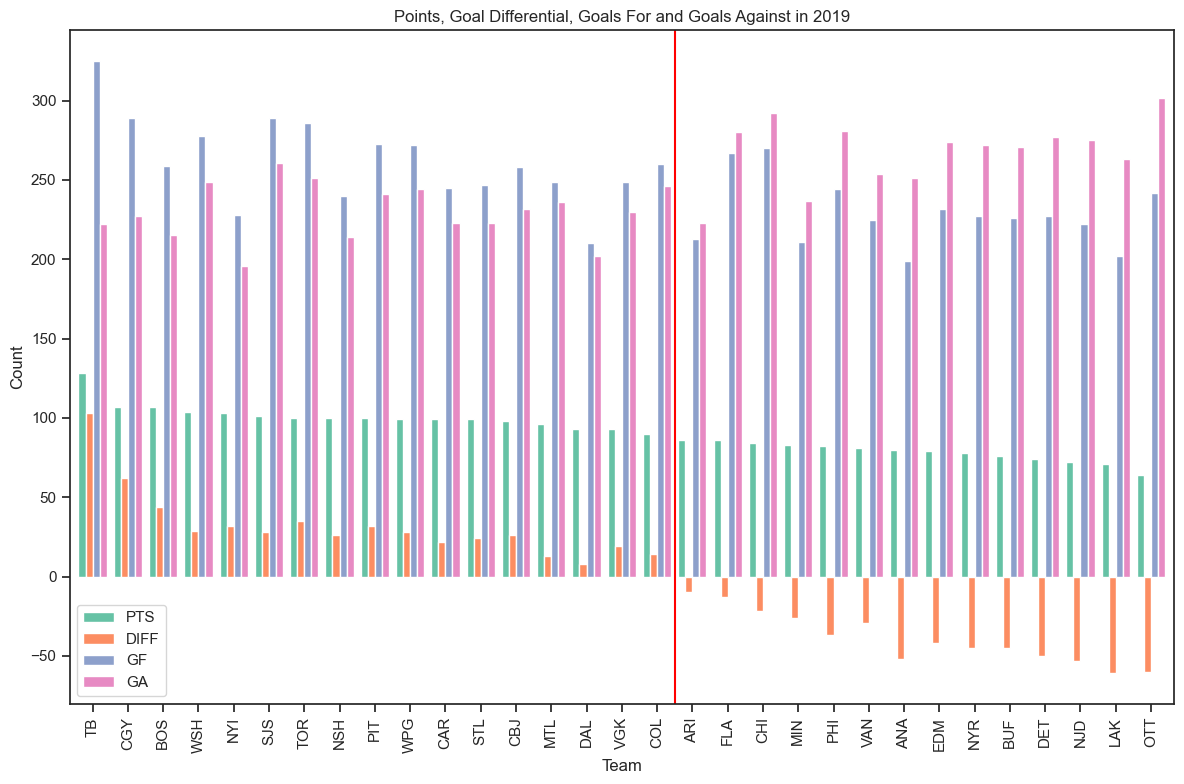

In [302]:
fig2 = plt.figure(figsize=(12, 8))
ax1 = fig2.add_subplot(1,1,1)
palette1 = sns.color_palette("Set2", 4)


ax1.axvline(x=16.5, color='red')
p2 = season_2019[['PTS','DIFF','GF','GA']].plot.bar(title="Points, Goal Differential, Goals For and Goals Against in 2019",ax = ax1,width=.8,color=palette1).legend(loc="lower left")
ax1.set_ylabel("Count")
ax1.set_xlabel("Team")
fig2.savefig("Plot3.jpg")


fig2.tight_layout()

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Team')

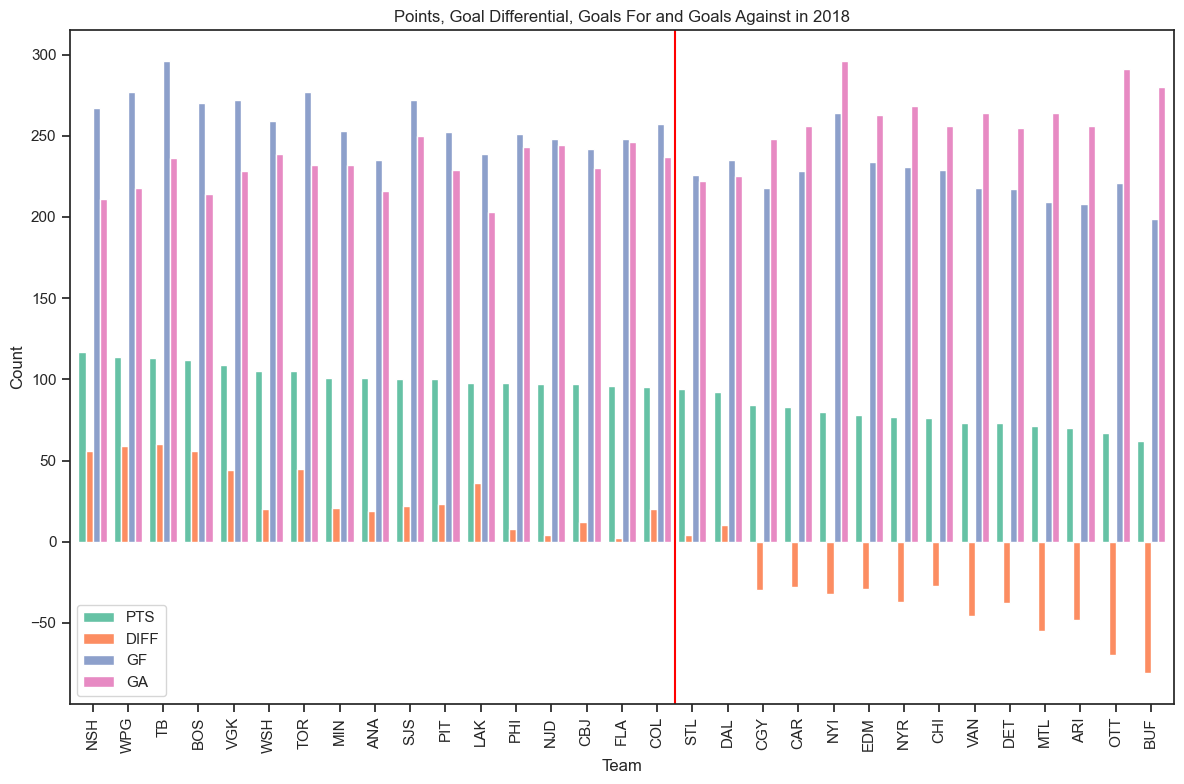

In [303]:
fig3 = plt.figure(figsize=(12, 8))
ax1 = fig3.add_subplot(1,1,1)

palette2 = sns.color_palette("Set2", 4)


p3 = season_2018[['PTS','DIFF','GF','GA']].plot.bar(title="Points, Goal Differential, Goals For and Goals Against in 2018",ax = ax1,width=.8,color=palette2).legend(loc="lower left")
ax1.set_ylabel("Count")
ax1.set_xlabel("Team")
ax1.axvline(x=16.5, color='red')
fig3.savefig("Plot4.jpg")

fig3.tight_layout()

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Team')

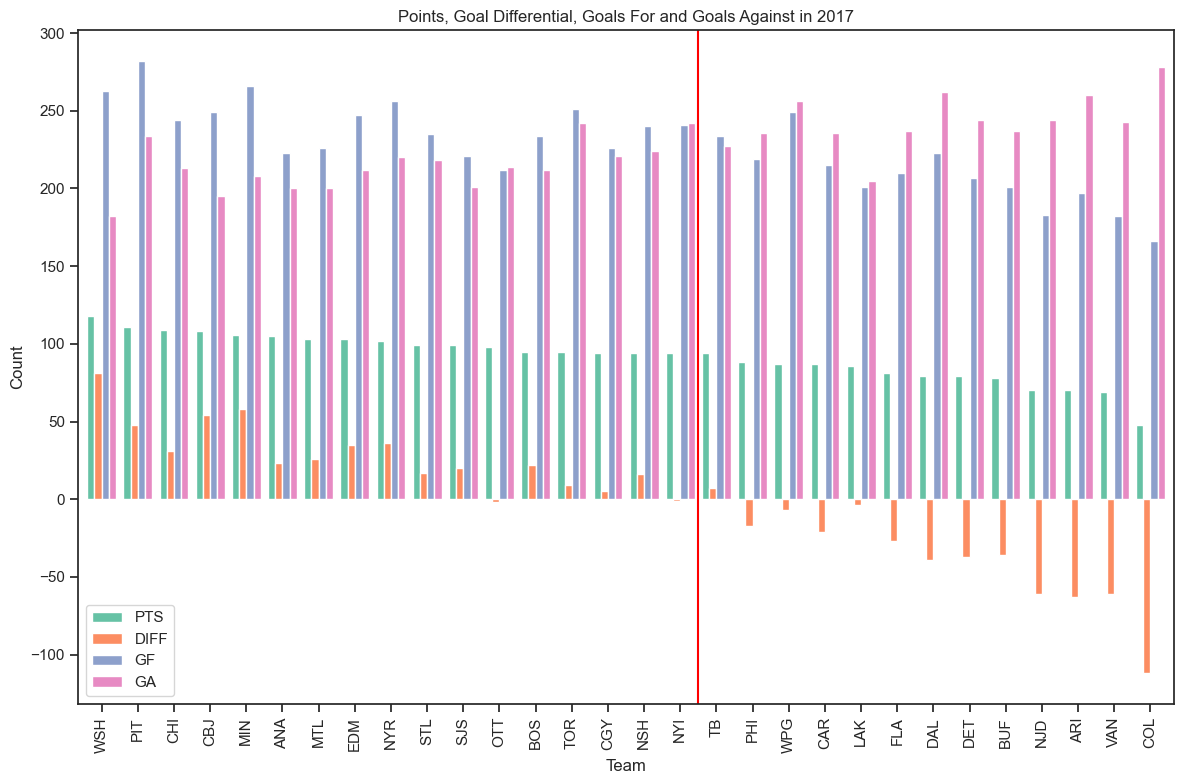

In [304]:
fig4 = plt.figure(figsize=(12, 8))
ax1 = fig4.add_subplot(1,1,1)
palette2 = sns.color_palette("Set2", 4)

p4 = season_2017[['PTS','DIFF','GF','GA']].plot.bar(title="Points, Goal Differential, Goals For and Goals Against in 2017",ax = ax1,width=.8,color=palette2).legend(loc="lower left")
ax1.set_ylabel("Count")
ax1.set_xlabel("Team")
ax1.axvline(x=16.5, color='red')
fig4.savefig("Plot5.jpg")

fig4.tight_layout()

<AxesSubplot:xlabel='GF', ylabel='PTS'>

Text(0.5, 1.0, 'Goals For by Season')

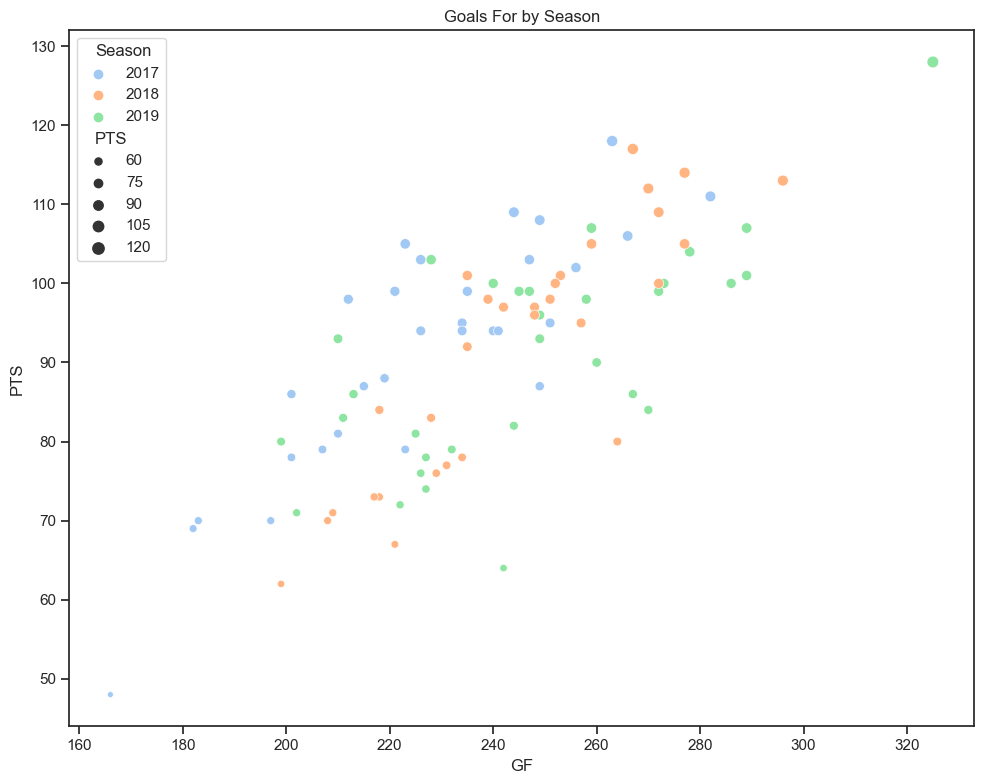

In [305]:
fig5 = plt.figure(figsize=(10, 8))
ax1 = fig5.add_subplot(1,1,1)

sns.scatterplot(data=nhl2,x="GF", y="PTS", hue="Season",size="PTS",palette="pastel",ax=ax1)
ax1.set_title("Goals For by Season")
fig5.savefig("Plot6.jpg")

fig5.tight_layout()

<AxesSubplot:xlabel='GA', ylabel='PTS'>

Text(0.5, 1.0, 'Goals Against by Season')

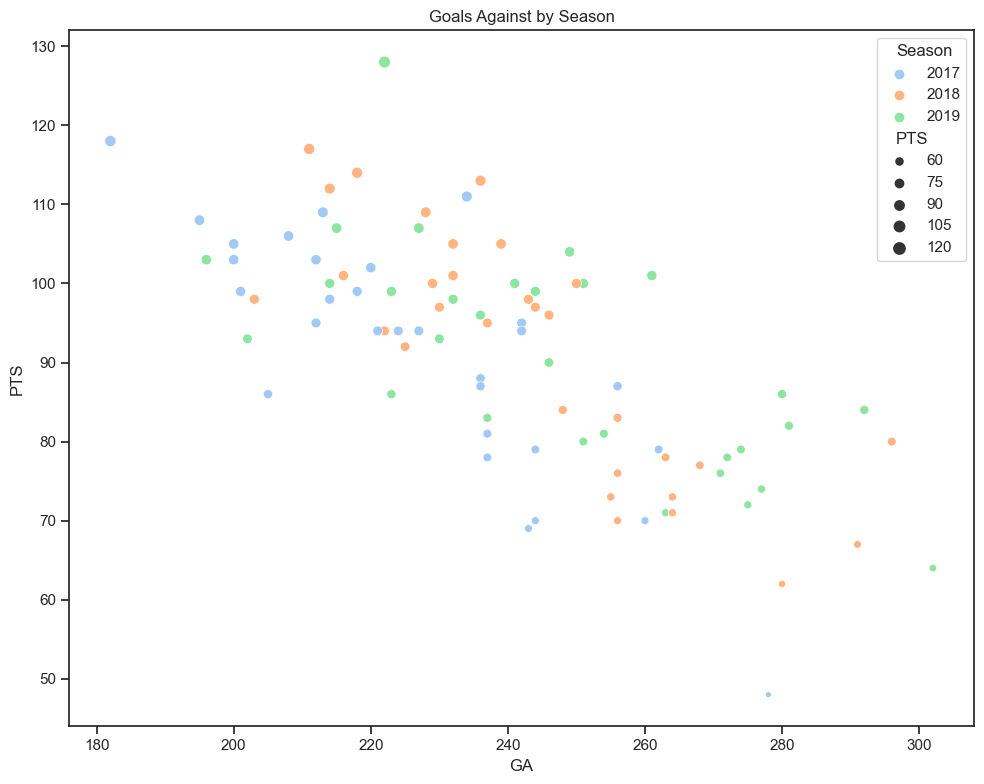

In [306]:
fig6 = plt.figure(figsize=(10, 8))
ax1 = fig6.add_subplot(1,1,1)

sns.scatterplot(data=nhl2,x="GA", y="PTS", hue="Season",size="PTS",palette="pastel",ax=ax1)
ax1.set_title("Goals Against by Season")

fig6.savefig("Plot7.jpg")

fig6.tight_layout()

Text(0.5, 1.0, 'Corsi For% by Season')

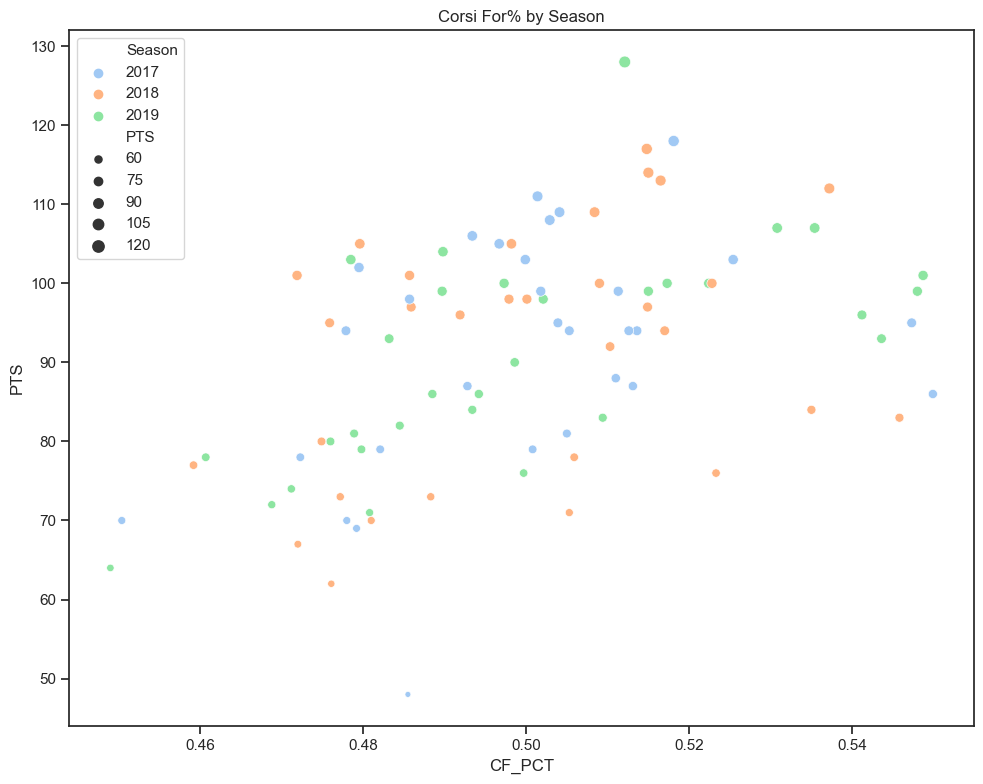

In [307]:
fig7 = plt.figure(figsize=(10, 8))
ax1 = fig7.add_subplot(1,1,1)

sns.scatterplot(data=nhl2,x="CF_PCT", y="PTS", hue="Season",size="PTS",palette="pastel",ax=ax1).legend(loc="upper left")
ax1.set_title("Corsi For% by Season")

fig7.savefig("Plot8.jpg")

fig7.tight_layout()